In [23]:
key="b4fe90ed47f647b5b95b90cf976db83f"
endpoint="https://staging-language-model.cognitiveservices.azure.com/"

In [24]:
import pandas as pd

In [25]:
data=pd.read_csv("Reviews.csv")
data=data.head(200)

In [26]:
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [27]:
client=TextAnalyticsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(key)
)

In [33]:
def Analyse_Summary(summary):
    sent_res=[]
    for j in range(0,len(summary),10):
        summary_sentiment=client.analyze_sentiment(summary[j:j+10])
        temp=[]
        for i in summary_sentiment:
            temp.append(i.sentiment)
        sent_res.extend(temp)
    return sent_res



In [34]:
lis=list(data['Summary'])

In [42]:
# print(lis)

In [41]:
sentiment=Analyse_Summary(lis)
sentiment_data=pd.DataFrame(sentiment)
sentiment_data

,0
0,positive
1,negative
2,positive
3,neutral
4,positive
...,...
195,neutral
196,neutral
197,neutral
198,positive


In [54]:
def key_phrase(Text):
    key_res=[]
    for j in range(1,len(Text),10):
        temp=[]
        summary_keyphrase=client.extract_key_phrases(Text[j:j+10])
        for i in summary_keyphrase:
            temp.append(i.key_phrases)
        key_res.extend(temp)
    return key_res

In [65]:
lis1=data['Text'].to_list()
# print(lis1)

In [57]:
key_p_data=pd.DataFrame(key_phrase(lis1))
key_p_data.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,Jumbo Salted Peanuts,Product,error,vendor,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"light, pillowy citrus gelatin",C.S. Lewis,tiny squares,powdered sugar,tiny mouthful,The Lion,The Wardrobe,yummy treat,The Witch,confection,...,None,None,None,None,None,None,None,None,None,None
2,Root Beer Extract,secret ingredient,cherry soda,Robitussin,addition,flavor,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Great taffy,great price,wide assortment,yummy taffy,taffy lover,Delivery,deal,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,five pound bag,red/black licorice-flavored pieces,wild hair,many flavors,root beer,particular favorites,delightful treat,taffy,watermelon,peppermint,...,None,None,None,None,None,None,None,None,None,None


In [60]:
def entities(Text):
    entities=[]
    for j in range(0,len(Text),5):
        temp=[]
        ent_res=client.recognize_entities(Text[j:j+5])
        for i in ent_res:
            temp.append([(entity.text, entity.category, entity.subcategory) for entity in i.entities])
        entities.extend(temp)
    return entities
        

In [61]:
# for i in entities(lis1):
#     print(i)
entities_data=pd.DataFrame(entities(lis1))
entities_data.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,"(Vitality, Organization, Sports)","(canned dog food products, Product, None)","(stew, Product, None)","(processed meat, Product, None)","(product, Product, None)",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"(Product, Product, None)","(Jumbo Salted Peanuts, Product, None)","(peanuts, Product, None)","(vendor, PersonType, None)",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"(confection, Product, None)","(gelatin, Product, None)","(Filberts, Product, None)","(powdered sugar, Product, None)","(heaven, Location, Structural)","(C.S. Lewis, Person, None)","(Edmund, Person, None)","(Brother, PersonType, None)","(Sisters, PersonType, None)","(Witch, PersonType, None)",...,None,None,None,None,None,None,None,None,None,None
3,"(Robitussin, Product, None)","(Root Beer Extract, Product, None)","(cherry soda, Product, None)",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"(taffy, Product, None)","(taffy, Product, None)","(Delivery, Skill, None)","(lover, PersonType, None)",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [38]:
import matplotlib.pyplot as plt

(array([161.,  39.]),
 array([0. , 1.5, 3. ]),
 <BarContainer object of 2 artists>)

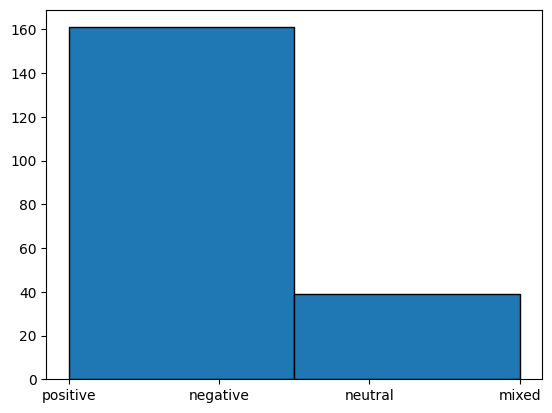

In [39]:
plt.hist(sentiment,bins=2,edgecolor='black')

In [62]:
sentiment_data.head()


,0
0,positive
1,negative
2,positive
3,neutral
4,positive


In [63]:
key_p_data.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,Jumbo Salted Peanuts,Product,error,vendor,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"light, pillowy citrus gelatin",C.S. Lewis,tiny squares,powdered sugar,tiny mouthful,The Lion,The Wardrobe,yummy treat,The Witch,confection,...,None,None,None,None,None,None,None,None,None,None
2,Root Beer Extract,secret ingredient,cherry soda,Robitussin,addition,flavor,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Great taffy,great price,wide assortment,yummy taffy,taffy lover,Delivery,deal,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,five pound bag,red/black licorice-flavored pieces,wild hair,many flavors,root beer,particular favorites,delightful treat,taffy,watermelon,peppermint,...,None,None,None,None,None,None,None,None,None,None


In [64]:
entities_data.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,"(Vitality, Organization, Sports)","(canned dog food products, Product, None)","(stew, Product, None)","(processed meat, Product, None)","(product, Product, None)",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"(Product, Product, None)","(Jumbo Salted Peanuts, Product, None)","(peanuts, Product, None)","(vendor, PersonType, None)",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"(confection, Product, None)","(gelatin, Product, None)","(Filberts, Product, None)","(powdered sugar, Product, None)","(heaven, Location, Structural)","(C.S. Lewis, Person, None)","(Edmund, Person, None)","(Brother, PersonType, None)","(Sisters, PersonType, None)","(Witch, PersonType, None)",...,None,None,None,None,None,None,None,None,None,None
3,"(Robitussin, Product, None)","(Root Beer Extract, Product, None)","(cherry soda, Product, None)",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"(taffy, Product, None)","(taffy, Product, None)","(Delivery, Skill, None)","(lover, PersonType, None)",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [68]:
from sqlalchemy import create_engine

In [69]:
server = 'staging-sentiment.database.windows.net'
database = 'staging-sentiment'
username = 'sentiment'
password = 'bharath@2001'

In [70]:
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'

In [71]:
engine = create_engine(connection_string)

In [ ]:
sentiment_data.to_sql('Sentiment_Data', engine, if_exists='replace', index=False)
key_p_data.to_sql('Key_Phrase_Data', engine, if_exists='replace', index=False)
entities_data.to_sql('Entities_Data', engine, if_exists='replace', index=False)